In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Подготовка данных для обучения для тестов

In [2]:
df = load_iris(as_frame=True)

In [3]:
df.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

Поскольку данные нужны только для `Iris Versicolor`(1), `Iris Virginica`(2), исключим `Iris Setosa` (0)

In [4]:
df = df.frame[df.frame.target != 0]

Трансформируем целевой вектор для бинарной классификации 0, 1

In [5]:
df['target'] = df['target'].apply(lambda x: 0 if x == 1 else 1)

In [6]:
X = df[df.columns[:4]].to_numpy()
y = df['target'].to_numpy()

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Реализация логистической регрессии

In [8]:
class LG():
    def __init__(self, alpha=0.25, iterations=500, model='gradient_descent'):
        self.alpha = alpha
        self.iterations = iterations
        self.m = 0 # rows
        self.j = 0 # columns
        self.costs = None
        self.X_train = None
        self.Y_train = None
        self.W = None
        self.model = model
        self.models = {
            'gradient_descent': self._run_gradient_descent,
            # ... others models
        }
        print(f'Logistic Regression initialized. Model: {self.model} ')
    
    def _sigmoida(self, z):
        return 1/(1 + np.exp(-z))
    
    def _h(self, X, W):
        return self._sigmoida(np.dot(X, W))
    
    def _cost(self, X, W, y):
        y_calculated = self._h(X, W)
        return (-1 * y.dot(np.log(y_calculated)) - (1 - y).dot(np.log(1 - y_calculated))) / len(X)

    def _gradient(self, X, W, y):
        return 2 * X.T.dot(self._h(X, W) - y) / len(X)
    
    def _run_gradient_descent(self):
        for i in range(self.iterations):
            current_cost = self._cost(self.X_train, self.W, self.Y_train)
            self.costs.append(current_cost)
            self.W = self.W - self.alpha * self._gradient(self.X_train, self.W, self.Y_train)

    def fit(self, X_train, Y_train):
        self.m, self.j = X_train.shape
        self.X_train=X_train
        self.Y_train=Y_train
        self.W = np.ones(shape=(1, self.j))[0]
        self.costs = []
        current_model = self.models[self.model]
        current_model()

    def predict(self, X):
        return np.array([0 if x < 0 else 1 for x in self.decision_function(X)])
    
    def decision_function(self, X):
        return X.dot(self.W)
    
    def score(self, X, y):
        return accuracy_score(self.predict(X), y)

    def visualize(self, figsize=(10, 10)):
        plt.figure(figsize=figsize)
        plt.scatter(range(len(self.costs)), self.costs)
        plt.xlabel('Iterations')
        plt.ylabel('Error cost')
        plt.show()

Презентация работы Логистической регрессии (градиентный спуск)

In [9]:
log_reg = LG(alpha=0.25, iterations=500, model='gradient_descent')

Logistic Regression initialized. Model: gradient_descent 


In [10]:
log_reg.fit(X_train, y_train)

Качество работы модели логистической регрессии LG:

In [11]:
log_reg.score(X_test, y_test)

0.9

Построим график зависимости ошибок от кол-ва итераций 

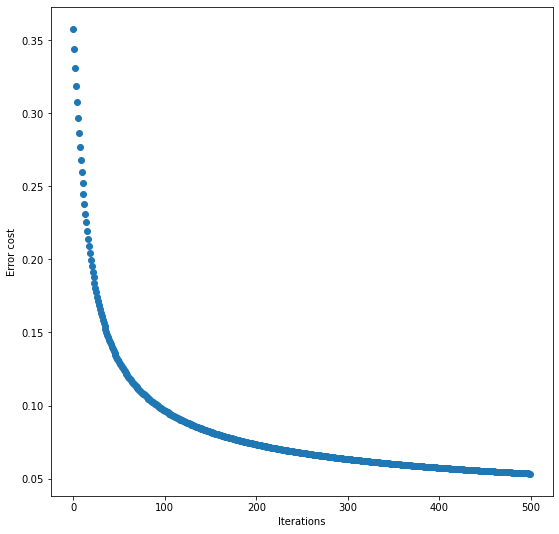

In [12]:
log_reg.visualize(figsize=(9, 9))

Построим график того, как происходит деление экземляров Iris'ов

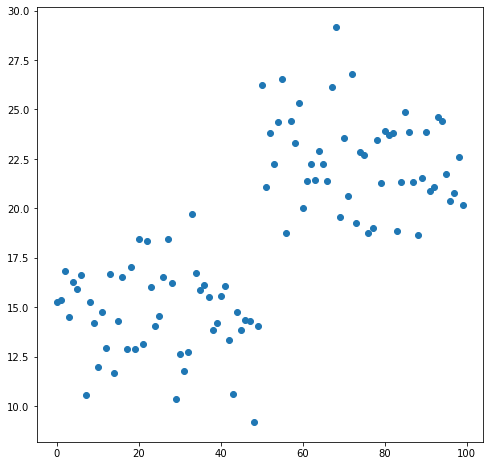

In [13]:
plt.figure(figsize=(8, 8))
y_points = log_reg.decision_function(X)
plt.scatter(range(len(y_points)), y_points)

# Сравнение со встроенной библиотекой

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
lg = LogisticRegression()

In [16]:
lg.fit(X_train, y_train)

LogisticRegression()

Построим график того, как происходит деление экземляров Iris'ов

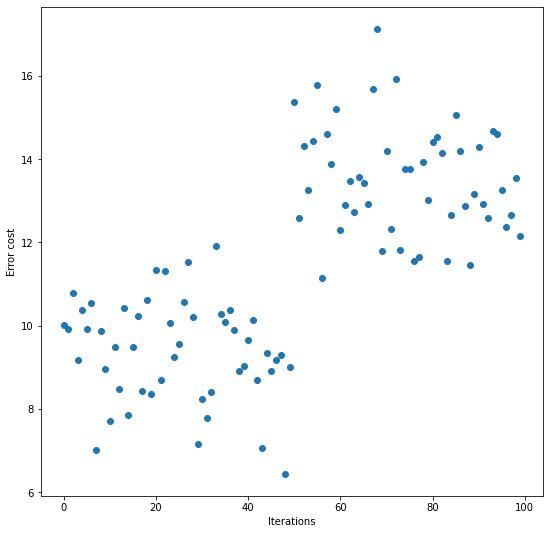

In [17]:
plt.figure(figsize=(9, 9))
y_points = lg.decision_function(X)
plt.scatter(range(len(y_points)), y_points)
plt.xlabel('Iterations')
plt.ylabel('Error cost')
plt.show()

Качество работы модели LogisticRegression из sklearn:

In [18]:
lg.score(X_test, y_test)

0.9

# Вывод

В рамках данной работы:
* подготовлены данные, для обучения и тестовые
* реализована логистическая регрессия
* в логистической регресси реализован метод градиентного спуска
* реализованная модель применена на практике
* построены графики для визуализации
* реализованную модель сравнили по качеству работы с моделью LogisticRegression из библиотеки sklearn - получился паритет на тестовых данных. Возможно на больших объемах LogisticRegression из библиотеки sklearn будет работать быстрее, поскольку более оптимизирована по скорости вычислений
